# Stage 02 - Data Pre-Processing

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'

# Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'

In [ ]:
df = pd.read_excel('/content/sample_data/E comm.xlsx')
df.head(10)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   
5       50006      1     0.0             Computer         1             22.0   
6       50007      1     NaN                Phone         3             11.0   
7       50008      1     NaN                Phone         1              6.0   
8       50009      1    13.0                Phone         3              9.0   
9       50010      1     NaN                Phone         1             31.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   
5           Debit Card  Female             3.0                         5   
6     Cash on Delivery    Male             2.0                         3   
7                   CC    Male             3.0                         3   
8             E wallet    Male             NaN                         4   
9           Debit Card    Male             2.0                         5   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   
5        Mobile Phone                  5        Single                2   
6  Laptop & Accessory                  2      Divorced                4   
7              Mobile                  2      Divorced                3   
8              Mobile                  3      Divorced                2   
9              Mobile                  3        Single                2   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   
5         1                         22.0         4.0         6.0   
6         0                         14.0         0.0         1.0   
7         1                         16.0         2.0         2.0   
8         1                         14.0         0.0         1.0   
9         0                         12.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60  
5                7.0          139.19  
6                0.0          120.86  
7                0.0          122.93  
8                2.0          126.83  
9                1.0          122.93

In [ ]:
# Pisahkan Categorical & Numerical

cats = []
nums = []

for i in df.columns:
  if df[i].dtype == 'object':
    cats.append(i)
  else:
    nums.append(i)

print('Categorical =', cats)
print('Numerical =', nums)

Categorical = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
Numerical = ['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


# Handling Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
for i in df.columns:
    percent = round(df[i].isna().sum()*100/len(df[i]),2)
    print(f'''Kolom {i}:''')
    print('Missing values :',df[i].isna().sum(),'dari ',len(df))
    print(f'''Presentase missing value:''',percent, '%')
    print('---'*10)

Kolom CustomerID:
Missing values : 0 dari  5630
Presentase missing value: 0.0 %
------------------------------
Kolom Churn:
Missing values : 0 dari  5630
Presentase missing value: 0.0 %
------------------------------
Kolom Tenure:
Missing values : 264 dari  5630
Presentase missing value: 4.69 %
------------------------------
Kolom PreferredLoginDevice:
Missing values : 0 dari  5630
Presentase missing value: 0.0 %
------------------------------
Kolom CityTier:
Missing values : 0 dari  5630
Presentase missing value: 0.0 %
------------------------------
Kolom WarehouseToHome:
Missing values : 251 dari  5630
Presentase missing value: 4.46 %
------------------------------
Kolom PreferredPaymentMode:
Missing values : 0 dari  5630
Presentase missing value: 0.0 %
------------------------------
Kolom Gender:
Missing values : 0 dari  5630
Presentase missing value: 0.0 %
------------------------------
Kolom HourSpendOnApp:
Missing values : 255 dari  5630
Presentase missing value: 4.53 %
---------

In [ ]:
import plotly.express as px

# Hitung persentase nilai yang hilang untuk setiap kolom
missing_percentages = (df.isna().sum() * 100 / len(df)).round(2)

# Buat DataFrame baru untuk digunakan dalam plotly
missing_df = pd.DataFrame({'Column': missing_percentages.index, 'MissingPercentage': missing_percentages.values})

# Buat horizontal bar chart interaktif menggunakan Plotly Express
fig = px.bar(missing_df, x='MissingPercentage', y='Column', text='MissingPercentage', orientation='h',
             title='Persentase Missing Value per Kolom', labels={'MissingPercentage': 'Persentase Missing Value'})

# Ganti warna menjadi merah
fig.update_traces(texttemplate='%{text}%', textposition='inside', marker_color='red')

# Atur parameter tampilan dan layout
fig.update_xaxes(title_text='Persentase Missing Value')
fig.update_yaxes(title_text='Kolom')

# Tampilkan plot
fig.show()


In [ ]:
df.describe().T

count          mean          std      min  \
CustomerID                   5630.0  52815.500000  1625.385339  50001.0   
Churn                        5630.0      0.168384     0.374240      0.0   
Tenure                       5366.0     10.189899     8.557241      0.0   
CityTier                     5630.0      1.654707     0.915389      1.0   
WarehouseToHome              5379.0     15.639896     8.531475      5.0   
HourSpendOnApp               5375.0      2.931535     0.721926      0.0   
NumberOfDeviceRegistered     5630.0      3.688988     1.023999      1.0   
SatisfactionScore            5630.0      3.066785     1.380194      1.0   
NumberOfAddress              5630.0      4.214032     2.583586      1.0   
Complain                     5630.0      0.284902     0.451408      0.0   
OrderAmountHikeFromlastYear  5365.0     15.707922     3.675485     11.0   
CouponUsed                   5374.0      1.751023     1.894621      0.0   
OrderCount                   5372.0      3.008004     2.939680      1.0   
DaySinceLastOrder            5323.0      4.543491     3.654433      0.0   
CashbackAmount               5630.0    177.223030    49.207036      0.0   

                                  25%       50%         75%       max  
CustomerID                   51408.25  52815.50  54222.7500  55630.00  
Churn                            0.00      0.00      0.0000      1.00  
Tenure                           2.00      9.00     16.0000     61.00  
CityTier                         1.00      1.00      3.0000      3.00  
WarehouseToHome                  9.00     14.00     20.0000    127.00  
HourSpendOnApp                   2.00      3.00      3.0000      5.00  
NumberOfDeviceRegistered         3.00      4.00      4.0000      6.00  
SatisfactionScore                2.00      3.00      4.0000      5.00  
NumberOfAddress                  2.00      3.00      6.0000     22.00  
Complain                         0.00      0.00      1.0000      1.00  
OrderAmountHikeFromlastYear     13.00     15.00     18.0000     26.00  
CouponUsed                       1.00      1.00      2.0000     16.00  
OrderCount                       1.00      2.00      3.0000     16.00  
DaySinceLastOrder                2.00      3.00      7.0000     46.00  
CashbackAmount                 145.77    163.28    196.3925    324.99

In [ ]:
df2 = df.copy() #Mencopy dataframe

In [ ]:
#Mengganti Phone -> Mobile Phone untuk menghilangkan redundansi data
df2['PreferredLoginDevice'] = df2['PreferredLoginDevice'].replace({'Phone' : 'Mobile Phone'})

In [ ]:
# Mengganti CC -> Credit Card & Cash on Delivery -> COD untuk menghilangkan redundansi data
df2['PreferredPaymentMode'] = df2['PreferredPaymentMode'].replace({'CC' : 'Credit Card', 'Cash on Delivery' : 'COD'})

In [ ]:
#Mengganti Mobile -> Tablet untuk menghilangkan redundansi data
df2['PreferredLoginDevice'] = df2['PreferredLoginDevice'].replace({'Mobile' : 'Tablet'})

## Dropna

Alasan menghapus Missing Values menggunakan dropna() dikarenakan:

- Menghilangkan Baris dengan Missing Values: dropna() digunakan untuk menghilangkan baris (entries) yang mengandung setidaknya satu missing value. Ini berguna jika kita ingin fokus pada data yang lengkap dan tidak ingin mengabaikan missing values.

- Menghindari Error: Ketika kita menjalankan analisis statistik atau pemodelan, missing values dapat menyebabkan error. Dengan menghapusnya, kita dapat memastikan bahwa analisis atau pemodelan berjalan dengan baik.

- Mengurangi Noise: Missing values dapat mempengaruhi hasil analisis data. Dengan menghapusnya, kita dapat mengurangi "noise" dalam data dan mendapatkan hasil yang lebih konsisten.


In [ ]:
df2 = df.dropna()
df2 = df.dropna(subset=['Tenure', 'WarehouseToHome','HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder'])
df2.dropna(inplace=True)
df2.dropna(subset=['Tenure', 'WarehouseToHome','HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder'], inplace=True)

In [ ]:
# Mengecek kembali apakah imputasi data sudah berhasil
df2.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [ ]:
# Melihat value count variabel numerical
for col in nums:
    percent = round(df2[col].value_counts()*100/len(df2[col]),2)
    print(f'''Value count kolom {col}:''')
    print(df2[col].value_counts())
    print('')
    print('Presentase :\n',percent)
    print('---'*10)
    print()

Value count kolom CustomerID:
50001    1
53991    1
53976    1
53977    1
53978    1
        ..
52220    1
52221    1
52223    1
52224    1
55630    1
Name: CustomerID, Length: 3774, dtype: int64

Presentase :
 50001    0.03
53991    0.03
53976    0.03
53977    0.03
53978    0.03
         ... 
52220    0.03
52221    0.03
52223    0.03
52224    0.03
55630    0.03
Name: CustomerID, Length: 3774, dtype: float64
------------------------------

Value count kolom Churn:
0    3143
1     631
Name: Churn, dtype: int64

Presentase :
 0    83.28
1    16.72
Name: Churn, dtype: float64
------------------------------

Value count kolom Tenure:
1.0     642
0.0     303
8.0     217
9.0     202
7.0     178
10.0    168
3.0     161
5.0     156
4.0     154
12.0    143
11.0    140
6.0     135
2.0     135
14.0    117
13.0    117
15.0    101
16.0    101
18.0     87
19.0     85
17.0     61
20.0     50
21.0     40
22.0     39
30.0     39
23.0     32
27.0     32
25.0     26
26.0     24
28.0     23
31.0     23
24

In [ ]:
# Melihat value count variable categorical
for col in cats:
    percent = round(df2[col].value_counts()*100/len(df2[col]),2)
    print(f'''Value count kolom {col}:''')
    print(df2[col].value_counts())
    print('')
    print('Presentase :\n',percent)
    print('---'*10)
    print()

Value count kolom PreferredLoginDevice:
Mobile Phone    1936
Computer        1111
Phone            727
Name: PreferredLoginDevice, dtype: int64

Presentase :
 Mobile Phone    51.30
Computer        29.44
Phone           19.26
Name: PreferredLoginDevice, dtype: float64
------------------------------

Value count kolom PreferredPaymentMode:
Debit Card          1538
Credit Card         1124
E wallet             443
COD                  301
UPI                  285
Cash on Delivery      48
CC                    35
Name: PreferredPaymentMode, dtype: int64

Presentase :
 Debit Card          40.75
Credit Card         29.78
E wallet            11.74
COD                  7.98
UPI                  7.55
Cash on Delivery     1.27
CC                   0.93
Name: PreferredPaymentMode, dtype: float64
------------------------------

Value count kolom Gender:
Male      2271
Female    1503
Name: Gender, dtype: int64

Presentase :
 Male      60.17
Female    39.83
Name: Gender, dtype: float64
-------------

# Statistical Summary

## Statistical analysis setelah imputasi data
- Univariate Analysis (Boxplot) setelah imputasi data
- Multivariate Analysis (Pairplot KDE) setelah imputasi data
- Multivariate Analysis (Heatmap) setelah imputasi data
> Melakukan visualisasi data setelah melakukan proses imputasi data untuk handling missing values untuk membandingkan dengan visualisasi data pada stage sebelumnya dan juga untuk mencari data-data yang perlu dilakukan treatment lebih lanjut.

### Univariate Analysis

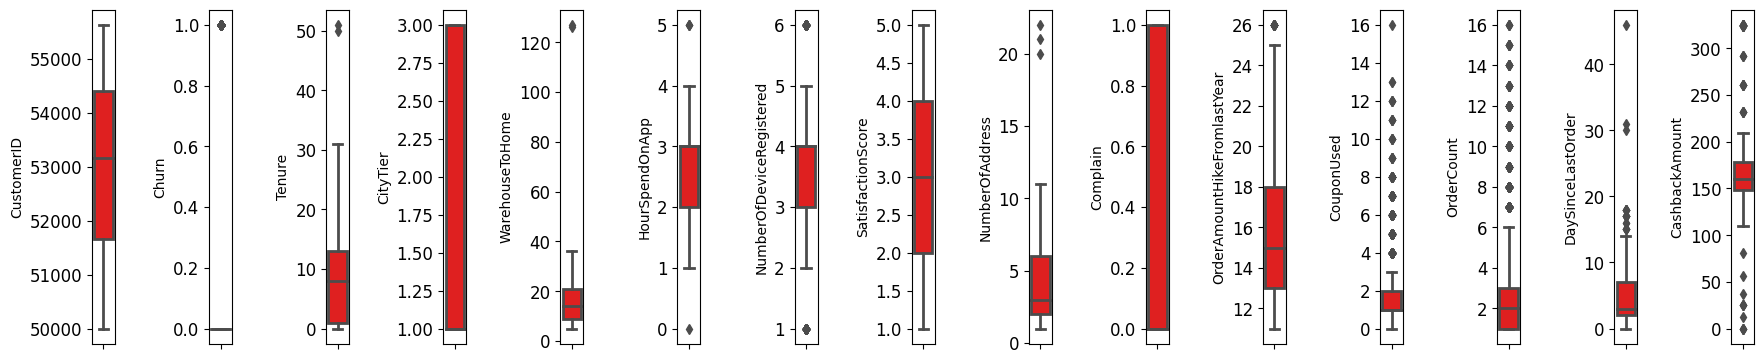

In [ ]:
# Membuat diagram boxplot
plt.figure(figsize=(18,4))

for i in range (0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df2[nums[i]], color='red', orient='v')
    plt.tight_layout(pad = 2)

### Multivariate Analysis

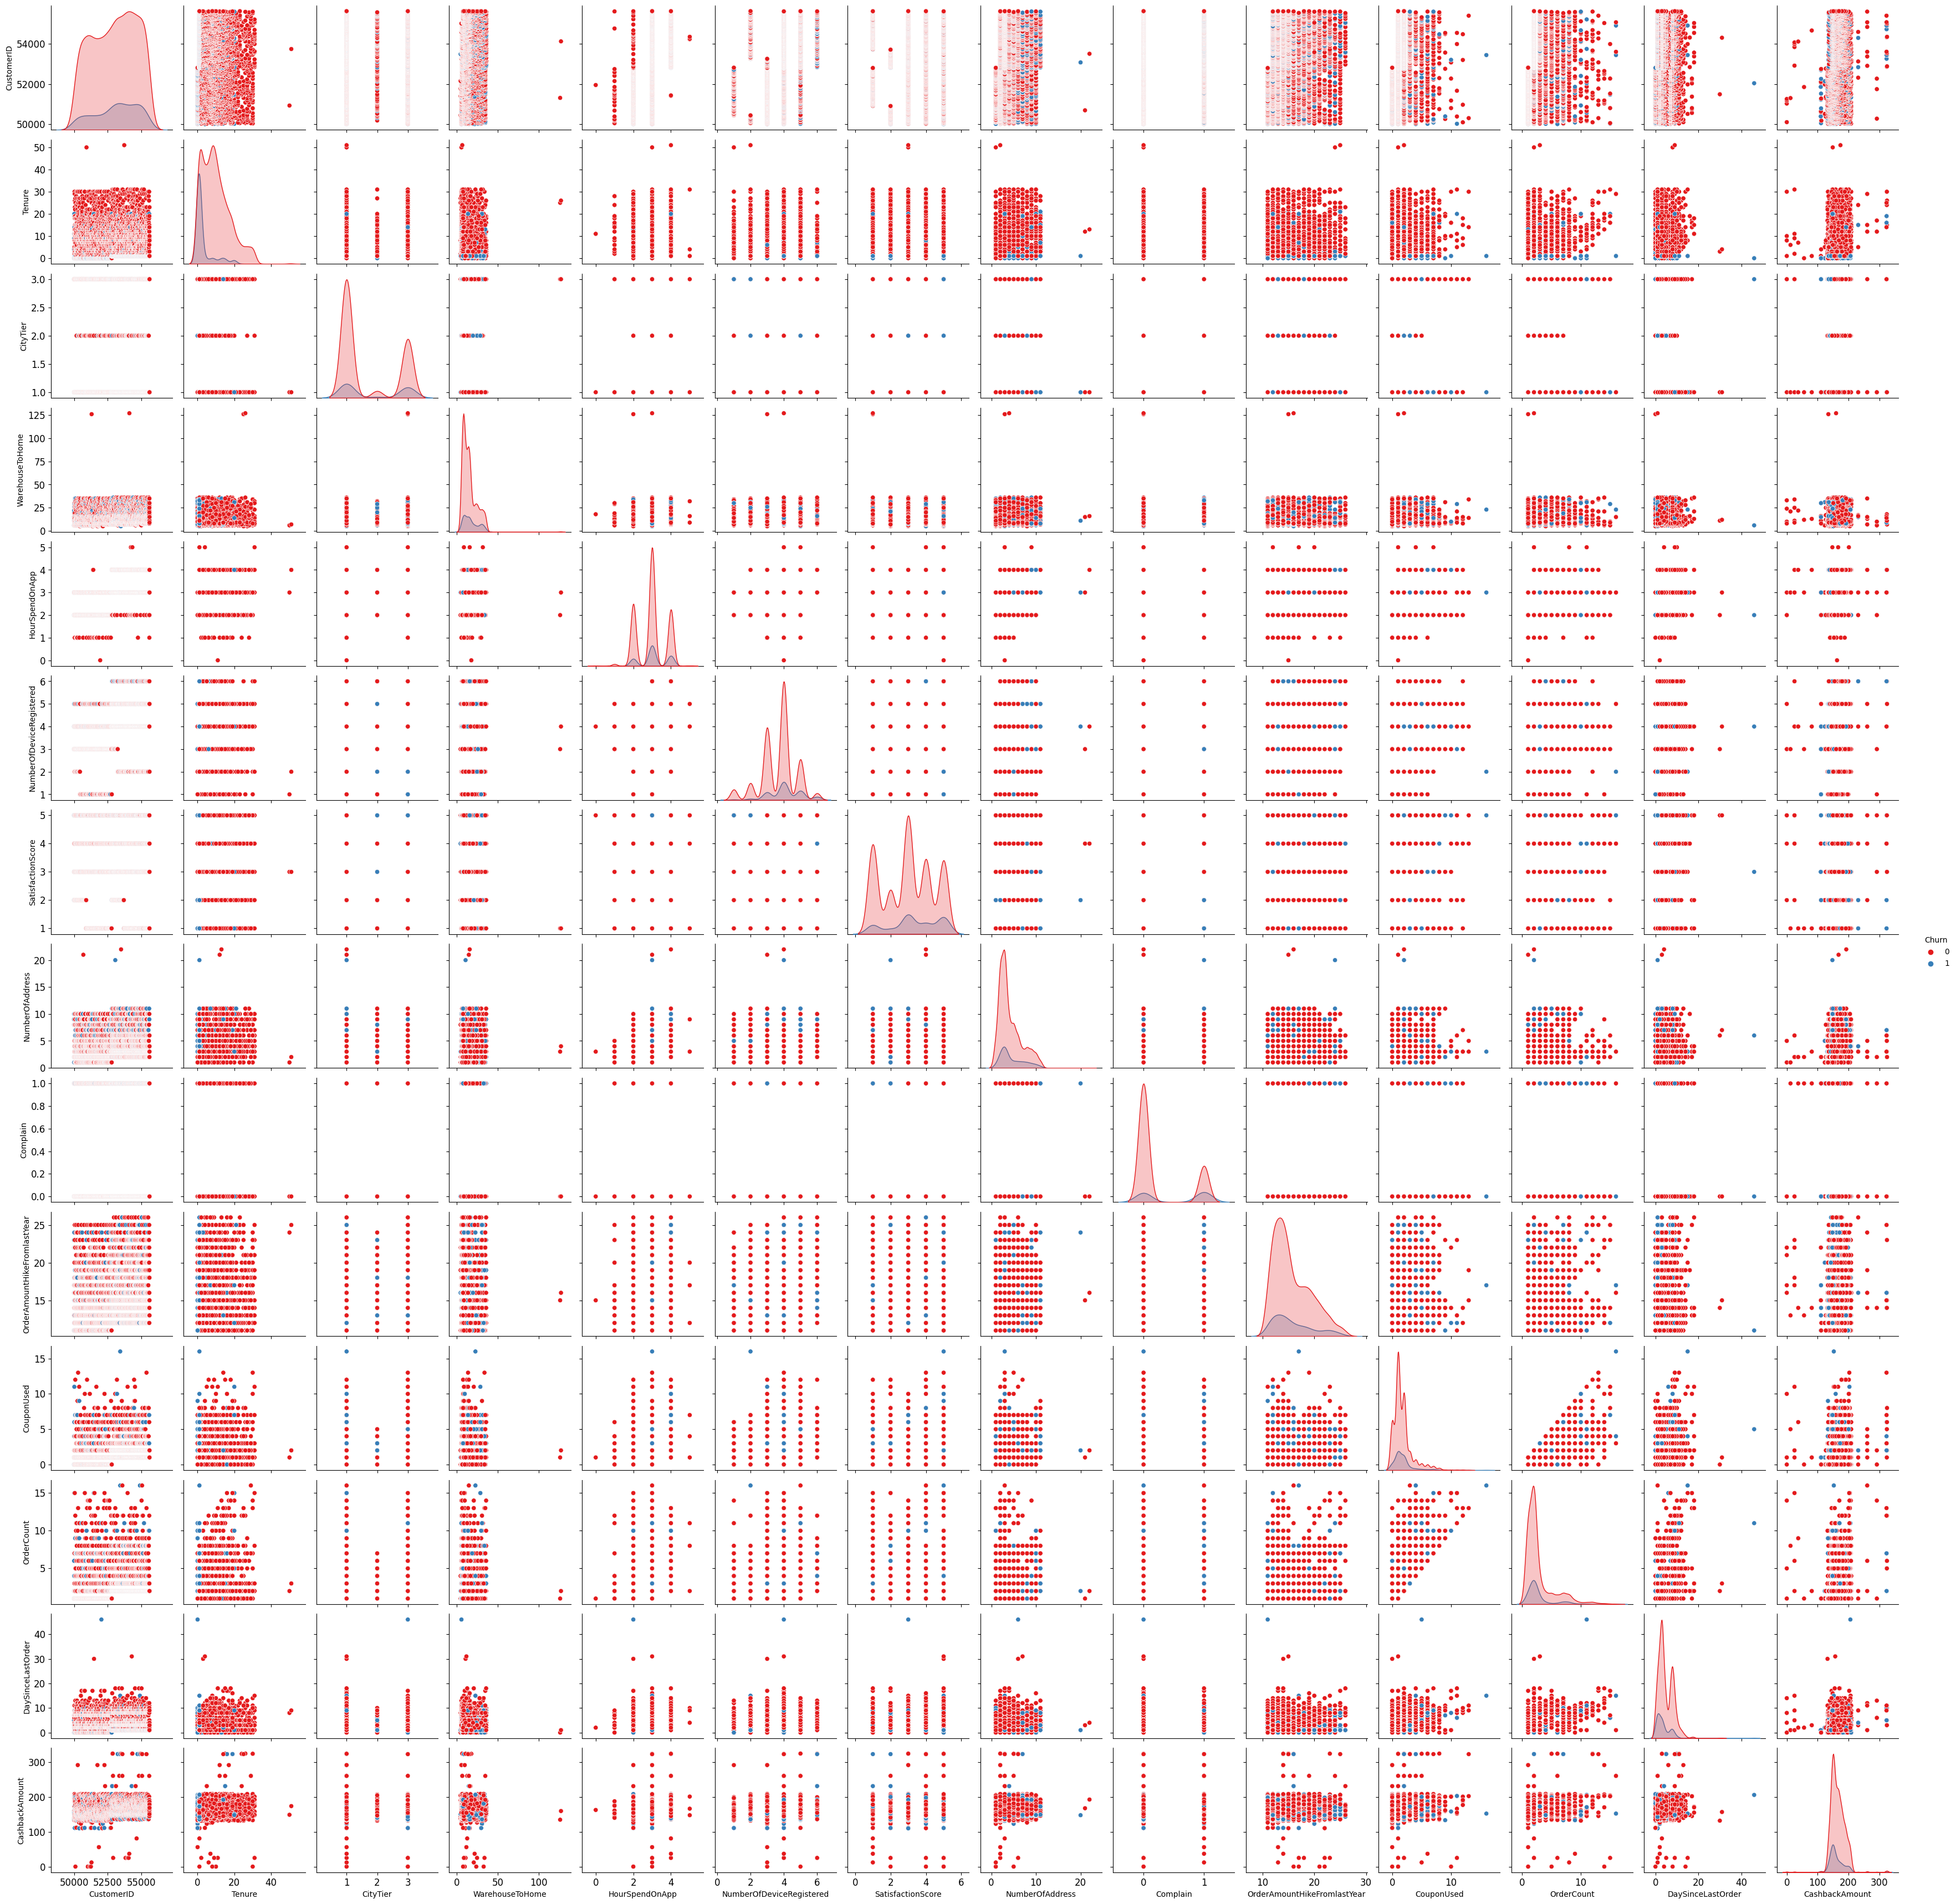

In [ ]:
# Pair Plots (Numeric)
sns.pairplot(df2, diag_kind='kde', hue='Churn', palette="Set1")

<Axes: >

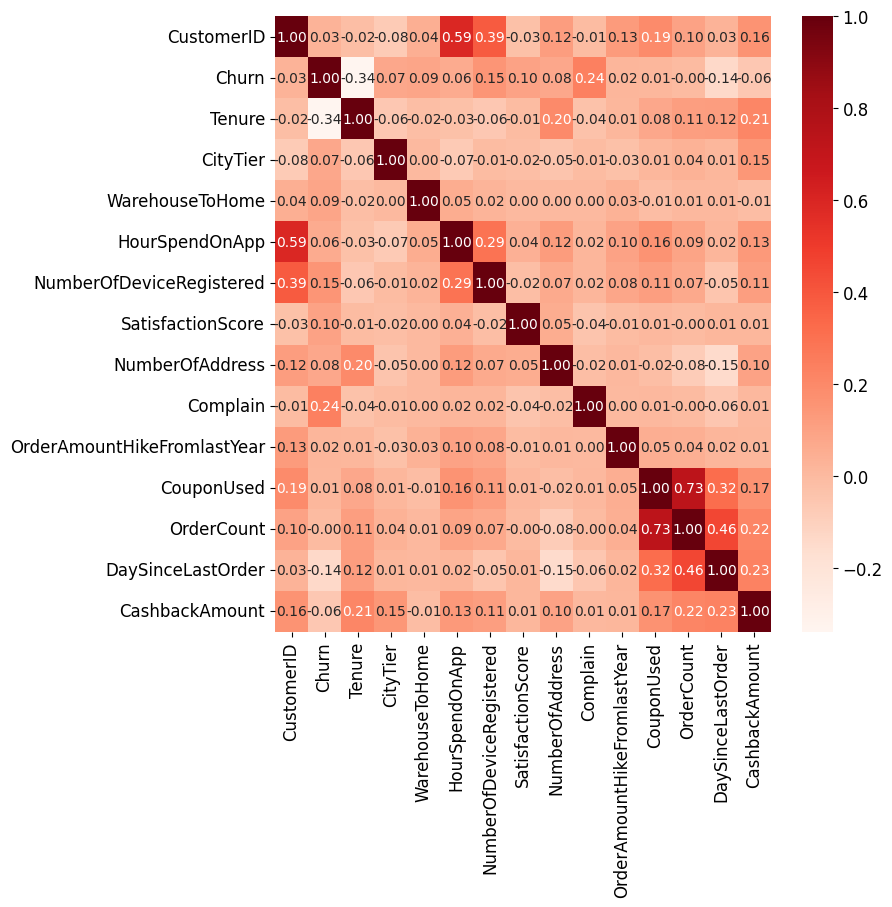

In [ ]:
# Correlation Heatmap (Numeric)
plt.figure(figsize=(8,8))
sns.heatmap(df2.corr(), cmap='Reds', annot=True, fmt='.2f')

Didapatkan hasil setelah handling missing values angka korelasi pada heatmap berkurang

# Handling Duplicated Data

In [ ]:
df2.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0        50001      1     4.0         Mobile Phone         3              6.0   
3        50004      1     0.0                Phone         3             15.0   
5        50006      1     0.0             Computer         1             22.0   
11       50012      1    11.0         Mobile Phone         1              6.0   
12       50013      1     0.0                Phone         1             11.0   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0            Debit Card  Female             3.0                         3   
3            Debit Card    Male             2.0                         4   
5            Debit Card  Female             3.0                         5   
11           Debit Card    Male             3.0                         4   
12                  COD    Male             2.0                         3   

      PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0   Laptop & Accessory                  2        Single                9   
3   Laptop & Accessory                  5        Single                8   
5         Mobile Phone                  5        Single                2   
11             Fashion                  3        Single               10   
12              Mobile                  3        Single                2   

    Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0          1                         11.0         1.0         1.0   
3          0                         23.0         0.0         1.0   
5          1                         22.0         4.0         6.0   
11         1                         13.0         0.0         1.0   
12         1                         13.0         2.0         2.0   

    DaySinceLastOrder  CashbackAmount  
0                 5.0          159.93  
3                 3.0          134.07  
5                 7.0          139.19  
11                0.0          153.81  
12                2.0          134.41

In [ ]:
df2.duplicated().sum()

0

tidak ada data duplikasi

# Outlier

In [ ]:
from scipy import stats

In [ ]:
initial_row_count = len(df2)

for col in ['Tenure', 'WarehouseToHome', 'CouponUsed', 'DaySinceLastOrder', 'CashbackAmount']:
    zscore = abs(stats.zscore(df2[col]))
    filtered_entries = (zscore < 3)
    df2 = df2[filtered_entries]

final_row_count = len(df2)
num_outliers = initial_row_count - final_row_count

print(f'Jumlah baris sebelum memfilter outlier: {initial_row_count}')
print(f'Jumlah baris setelah memfilter outlier: {final_row_count}')
percentage_outliers = (num_outliers / initial_row_count) * 100
print(f'Presentase data yang dihapus: {percentage_outliers:.2f}%')

Jumlah baris sebelum memfilter outlier: 3774
Jumlah baris setelah memfilter outlier: 3615
Presentase data yang dihapus: 4.21%


# Feature Encoding

In [ ]:
mapping_gender = {
    'Female' : 0,
    'Male' : 1
}
df2['Gender'] = df2['Gender'].map(mapping_gender)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
for cat in ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus']:
  onehots = pd.get_dummies(df2[cat], prefix=cat)
  df2 = df2.join(onehots)

In [ ]:
# drop kolom kategori yang asli (karena sudah di-encoding)
df2 = df2.drop(columns=['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus']).copy()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3615 entries, 0 to 5629
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CustomerID                             3615 non-null   int64  
 1   Churn                                  3615 non-null   int64  
 2   Tenure                                 3615 non-null   float64
 3   CityTier                               3615 non-null   int64  
 4   WarehouseToHome                        3615 non-null   float64
 5   Gender                                 3615 non-null   int64  
 6   HourSpendOnApp                         3615 non-null   float64
 7   NumberOfDeviceRegistered               3615 non-null   int64  
 8   SatisfactionScore                      3615 non-null   int64  
 9   NumberOfAddress                        3615 non-null   int64  
 10  Complain                               3615 non-null   int64  
 11  Orde

In [ ]:
df2.head()

CustomerID  Churn  Tenure  CityTier  WarehouseToHome  Gender  \
0        50001      1     4.0         3              6.0       0   
3        50004      1     0.0         3             15.0       1   
5        50006      1     0.0         1             22.0       0   
11       50012      1    11.0         1              6.0       1   
12       50013      1     0.0         1             11.0       1   

    HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
0              3.0                         3                  2   
3              2.0                         4                  5   
5              3.0                         5                  5   
11             3.0                         4                  3   
12             2.0                         3                  3   

    NumberOfAddress  ...  PreferredPaymentMode_E wallet  \
0                 9  ...                              0   
3                 8  ...                              0   
5                 2  ...                              0   
11               10  ...                              0   
12                2  ...                              0   

    PreferredPaymentMode_UPI  PreferedOrderCat_Fashion  \
0                          0                         0   
3                          0                         0   
5                          0                         0   
11                         0                         1   
12                         0                         0   

    PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
0                          0                                    1   
3                          0                                    1   
5                          0                                    0   
11                         0                                    0   
12                         0                                    0   

    PreferedOrderCat_Mobile  PreferedOrderCat_Mobile Phone  \
0                         0                              0   
3                         0                              0   
5                         0                              1   
11                        0                              0   
12                        1                              0   

    MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  
0                        0                      0                     1  
3                        0                      0                     1  
5                        0                      0                     1  
11                       0                      0                     1  
12                       0                      0                     1  

[5 rows x 34 columns]

# Feature Transformation

In [ ]:
from scipy.stats import skew, kurtosis

In [ ]:
feature_trans = nums.copy()
del feature_trans[:2]
feature_normal = []
feature_non_normal = []

for i in feature_trans:
  skw = skew(df2[i])
  kts = kurtosis(df2[i])
  if skw < 2 and skw > -2:
    if kts < 2 and kts > -2:
      feature_normal.append(i)
    else:
      feature_non_normal.append(i)
  else:
    feature_non_normal.append(i)

print('Distribusi Normal:', feature_normal)
print('Distribusi Non Normal:', feature_non_normal)

Distribusi Normal: ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'DaySinceLastOrder', 'CashbackAmount']
Distribusi Non Normal: ['CouponUsed', 'OrderCount']


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
feature = df2.columns.tolist()
del feature[:2]
feature

['Tenure',
 'CityTier',
 'WarehouseToHome',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount',
 'PreferredLoginDevice_Computer',
 'PreferredLoginDevice_Mobile Phone',
 'PreferredLoginDevice_Phone',
 'PreferredPaymentMode_CC',
 'PreferredPaymentMode_COD',
 'PreferredPaymentMode_Cash on Delivery',
 'PreferredPaymentMode_Credit Card',
 'PreferredPaymentMode_Debit Card',
 'PreferredPaymentMode_E wallet',
 'PreferredPaymentMode_UPI',
 'PreferedOrderCat_Fashion',
 'PreferedOrderCat_Grocery',
 'PreferedOrderCat_Laptop & Accessory',
 'PreferedOrderCat_Mobile',
 'PreferedOrderCat_Mobile Phone',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single']

In [ ]:
transform = feature_normal + feature_non_normal
X = df2[feature]
y = df2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
for i in transform:
  scaler = StandardScaler().fit(X_train[[i]])
  X_train[i] = scaler.transform(X_train[[i]])
  X_test[i] = scaler.transform(X_test[[i]])

X_train.head()

Tenure  CityTier  WarehouseToHome  Gender  HourSpendOnApp  \
3103  0.996289 -0.760232         2.336939       0        0.033998   
5026  0.729190  1.372125        -0.814560       1        1.421339   
2043 -0.072106  1.372125         1.003612       0       -1.353343   
3860 -1.006952 -0.760232        -0.814560       1        0.033998   
5023 -0.205655  0.305947        -0.814560       1        1.421339   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
3103                  1.219556          -0.730600        -0.871450  -0.62887   
5026                  0.250195           0.718571         1.116260  -0.62887   
2043                 -0.719167          -0.006014        -0.871450  -0.62887   
3860                  0.250195          -1.455185        -0.076366  -0.62887   
5023                  0.250195          -0.006014        -0.473908  -0.62887   

      OrderAmountHikeFromlastYear  ...  PreferredPaymentMode_E wallet  \
3103                    -1.011140  ...                              0   
5026                    -0.736627  ...                              0   
2043                     0.086911  ...                              0   
3860                    -0.462115  ...                              0   
5023                    -0.462115  ...                              0   

      PreferredPaymentMode_UPI  PreferedOrderCat_Fashion  \
3103                         0                         0   
5026                         0                         0   
2043                         0                         0   
3860                         0                         0   
5023                         1                         0   

      PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
3103                         0                                    1   
5026                         0                                    1   
2043                         0                                    1   
3860                         0                                    0   
5023                         0                                    0   

      PreferedOrderCat_Mobile  PreferedOrderCat_Mobile Phone  \
3103                        0                              0   
5026                        0                              0   
2043                        0                              0   
3860                        0                              1   
5023                        0                              1   

      MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  
3103                       1                      0                     0  
5026                       0                      1                     0  
2043                       0                      1                     0  
3860                       0                      0                     1  
5023                       0                      1                     0  

[5 rows x 32 columns]

In [ ]:
df2.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   3615.000000  3615.000000  3615.000000  3615.000000      3615.000000   
mean   53016.013555     0.167358     8.588658     1.708990        15.734440   
std     1609.105080     0.373347     7.545533     0.936243         8.217422   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51651.500000     0.000000     1.000000     1.000000         9.000000   
50%    53153.000000     0.000000     7.000000     1.000000        14.000000   
75%    54392.000000     0.000000    13.000000     3.000000        21.000000   
max    55630.000000     1.000000    31.000000     3.000000        36.000000   

            Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
count  3615.000000     3615.000000               3615.000000   
mean      0.605256        2.977870                  3.747441   
std       0.488863        0.721676                  1.026815   
min       0.000000        0.000000                  1.000000   
25%       0.000000        2.000000                  3.000000   
50%       1.000000        3.000000                  4.000000   
75%       1.000000        3.000000                  4.000000   
max       1.000000        5.000000                  6.000000   

       SatisfactionScore  NumberOfAddress  ...  PreferredPaymentMode_E wallet  \
count        3615.000000      3615.000000  ...                    3615.000000   
mean            3.048133         4.232642  ...                       0.118396   
std             1.388109         2.563059  ...                       0.323121   
min             1.000000         1.000000  ...                       0.000000   
25%             2.000000         2.000000  ...                       0.000000   
50%             3.000000         3.000000  ...                       0.000000   
75%             4.000000         6.000000  ...                       0.000000   
max             5.000000        22.000000  ...                       1.000000   

       PreferredPaymentMode_UPI  PreferedOrderCat_Fashion  \
count               3615.000000               3615.000000   
mean                   0.075519                  0.112863   
std                    0.264263                  0.316469   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  0.000000   
max                    1.000000                  1.000000   

       PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
count               3615.000000                          3615.000000   
mean                   0.000277                             0.523928   
std                    0.016632                             0.499496   
min                    0.000000                             0.000000   
25%                    0.000000                             0.000000   
50%                    0.000000                             1.000000   
75%                    0.000000                             1.000000   
max                    1.000000                             1.000000   

       PreferedOrderCat_Mobile  PreferedOrderCat_Mobile Phone  \
count              3615.000000                    3615.000000   
mean                  0.032089                       0.330844   
std                   0.176260                       0.470582   
min                   0.000000                       0.000000   
25%                   0.000000                       0.000000   
50%                   0.000000                       0.000000   
75%                   0.000000                       1.000000   
max                   1.000000                       1.000000   

       MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  
count             3615.000000            3615.000000           3615.000000  
mean                 0.143292               0.52254

# Class Imbalance

Karena target klasifikasi pada pemodelan yang akan dilakukan menggunakan kolom churn, maka perlu dicek dahulu apakah kolom churn memiliki data yang imbalanced atau balanced.

In [ ]:
df2['Churn_Class'] = df2['Churn']>0.9
print(df2['Churn_Class'].value_counts())
#Menampilkan jumlah pelanggan churn dan tidak, membuat target bertipe categorical

False    3010
True      605
Name: Churn_Class, dtype: int64


In [ ]:
x = df2[[col for col in df2.columns if col not in ['Churn_Class','Churn']]].values
y = df2['Churn_Class'].values
print(x.shape)
print(y.shape)
#Pemisahan feature dan target

(3615, 33)
(3615,)


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Buat objek RandomUnderSampler dengan sampling strategy 1.0 (menjaga jumlah sampel kelas minoritas)
rus = RandomUnderSampler(sampling_strategy=1.0)
x_under, y_under = rus.fit_resample(X, y)

# Buat objek RandomOverSampler dengan sampling strategy 1.0 (menjaga jumlah sampel kelas minoritas)
ros = RandomOverSampler(sampling_strategy=1.0)
x_over, y_over = ros.fit_resample(X, y)

# Buat objek SMOTE (Synthetic Minority Over-sampling Technique) tanpa mengatur sampling strategy
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, y)

In [ ]:
print(pd.Series(y).value_counts())

False    3010
True      605
dtype: int64


In [ ]:
print(pd.Series(y_over).value_counts())

True     3010
False    3010
dtype: int64


In [ ]:
print(pd.Series(y_under).value_counts())

False    605
True     605
dtype: int64


In [ ]:
print(pd.Series(y_smote).value_counts())

True     3010
False    3010
dtype: int64


# Feature selection##

In [ ]:
df3 = df2.copy() #Mencopy dataframe

In [ ]:
df3.head()

CustomerID  Churn  Tenure  CityTier  WarehouseToHome  Gender  \
0        50001      1     4.0         3              6.0       0   
3        50004      1     0.0         3             15.0       1   
5        50006      1     0.0         1             22.0       0   
11       50012      1    11.0         1              6.0       1   
12       50013      1     0.0         1             11.0       1   

    HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
0              3.0                         3                  2   
3              2.0                         4                  5   
5              3.0                         5                  5   
11             3.0                         4                  3   
12             2.0                         3                  3   

    NumberOfAddress  ...  PreferredPaymentMode_UPI  PreferedOrderCat_Fashion  \
0                 9  ...                         0                         0   
3                 8  ...                         0                         0   
5                 2  ...                         0                         0   
11               10  ...                         0                         1   
12                2  ...                         0                         0   

    PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
0                          0                                    1   
3                          0                                    1   
5                          0                                    0   
11                         0                                    0   
12                         0                                    0   

    PreferedOrderCat_Mobile  PreferedOrderCat_Mobile Phone  \
0                         0                              0   
3                         0                              0   
5                         0                              1   
11                        0                              0   
12                        1                              0   

    MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  \
0                        0                      0                     1   
3                        0                      0                     1   
5                        0                      0                     1   
11                       0                      0                     1   
12                       0                      0                     1   

    Churn_Class  
0          True  
3          True  
5          True  
11         True  
12         True  

[5 rows x 35 columns]

In [63]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Menggunakan mutual information untuk seleksi fitur
selector = SelectKBest(mutual_info_classif, k=6)  # kita ingin memilih 6 fitur terbaik
X_new = selector.fit_transform(X, y)

# Mendapatkan indeks fitur terbaik
best_feature_indices = selector.get_support(indices=True)
best_features = X.columns[best_feature_indices]

# Menampilkan fitur terbaik
print("Fitur Terbaik:")
print(best_features)

Fitur Terbaik:
Index(['Tenure', 'Complain', 'DaySinceLastOrder', 'CashbackAmount',
       'MaritalStatus_Married', 'Churn_Class'],
      dtype='object')


Beberapa insight yang dapat diperoleh ini adalah:

- Tenure adalah Fitur Paling penting: kita bisa melihat bahwa "Tenure" memiliki mutual_info_classif yang jauh lebih tinggi dibandingkan dengan fitur lainnya. Diikuti Complain ini menunjukkan bahwa Complain dan lamanya pelanggan berlangganan memiliki dampak yang signifikan pada keputusan churn. Dengan kata lain, pelanggan yang telah berlangganan lebih lama cenderung kurang cenderung untuk berhenti berlangganan dan pelanggan yang sering mengajukan keluhan mungkin memiliki kecenderungan lebih tinggi untuk churn.

- DaySinceLastOrder Score dan CashbackAmount: Fitur "DaySinceLastOrder" juga memiliki  mutual_info_classif yang cukup tinggi, menunjukkan bahwa Jumlah hari sejak pesanan terakhir dapat mengindikasikan tingkat keterlibatan pelanggan. Pelanggan yang sering melakukan pesanan mungkin memiliki periode waktu yang lebih pendek antara pesanan, dan ini bisa menjadi faktor yang memengaruhi keputusan mereka untuk tetap berlangganan. Selain itu, fitur "CashbackAmount" juga memiliki kontribusi yang signifikan, menunjukkan bahwa Pelanggan yang menerima lebih banyak cashback mungkin lebih cenderung tetap berlangganan, terutama jika mereka merasa mendapatkan manfaat finansial.

- Fitur Kategoris: Fitur kategoris seperti "PreferredLoginDevice," "PreferredPaymentMode," "Gender," "MaritalStatus," "CityTier,", 'Churn_Class' dan "NumberOfAddress" juga berkontribusi dalam memprediksi churn.

Dengan informasi ini, kita dapat mempertimbangkan untuk memprioritaskan fitur-fitur ini dalam membangun model prediksi churn. Penyesuaian model berdasarkan insight ini dapat membantu perusahaan dalam mengurangi churn pelanggan.

**Tidak ada feature yang akan di hapus karena kami menanggap semua feature penting**

# Feature Extraction ##

In [ ]:
# Membuat fitur TotalSpending (kali OrderAmountHikeFromlastYear dengan CouponUsed)
df3['TotalSpending'] = df3['OrderAmountHikeFromlastYear'] * df3['CouponUsed']

# Membuat fitur CustomerCategory berdasarkan TotalSpending
def categorize_customer(row):
    if row['TotalSpending'] >= 2:
        return "Pengguna Aktif"
    else:
        return "Pengguna Tidak Aktif"

df3['CustomerCategory'] = df3.apply(categorize_customer, axis=1)

# Membuat fitur MeanOrderAmountHikeFromlastYear berdasarkan rata-rata OrderAmountHike
mean_order_amount_hike = df2['OrderAmountHikeFromlastYear'].mean()
df3['MeanOrderAmountHikeFromlastYear'] = mean_order_amount_hike

# Membuat fitur baru berdasarkan interaksi antara OrderAmountHikeFromlastYear dan CouponUsed
df3['OrderAmountHike_Coupon_Interact'] = df3['OrderAmountHikeFromlastYear'] * df3['CouponUsed']

df3['Tenure_Category'] = pd.cut(df3['Tenure'], bins=[0, 6, 12, 24,], labels=['New', 'Pelanggan menengah','Loyal customers'])

# mengekspor data ke file excel jika diperlukan
df3.to_excel('extracted_features.xlsx', index=False)

**TotalSpending:**
- Fitur TotalSpending dibuat dengan mengalikan OrderAmountHikeFromlastYear dengan CouponUsed.
- *Insight:* Ini bisa digunakan untuk mengidentifikasi total pengeluaran pelanggan berdasarkan kenaikan jumlah pesanan dan kupon yang digunakan.

**CustomerCategory :**

- Fitur CustomerCategory dibuat dengan membagi pelanggan menjadi "Pengguna Aktif" jika total pengeluaran lebih besar atau sama dengan 2, dan "Pengguna Tidak Aktif" jika sebaliknya.
- *Insight:* Ini membantu dalam mengelompokkan pelanggan menjadi dua kategori berdasarkan perilaku pengeluaran mereka.

**MeanOrderAmountHikeFromlastYear:**

- Fitur MeanOrderAmountHikeFromlastYear dibuat dengan mengambil rata-rata dari OrderAmountHikeFromlastYear untuk seluruh data.
- *Insight:* Ini memberikan nilai rata-rata kenaikan jumlah pesanan dari tahun lalu, yang dapat digunakan sebagai pembanding.

**OrderAmountHike_Coupon_Interact:**

- Fitur OrderAmountHike_Coupon_Interact dibuat dengan mengalikan OrderAmountHikeFromlastYear dengan CouponUsed.
- *Insight:* Ini menciptakan fitur yang mencerminkan interaksi antara kenaikan jumlah pesanan dan penggunaan kupon, Fitur ini melihat bagaimana kenaikan jumlah pesanan dapat dipengaruhi oleh penggunaan kupon.

**Tenure_Category:**

- Fitur Tenure_Category (Kategori Masa Tenure): Ini adalah fitur kategoris yang menggambarkan kategori masa "Tenure" pelanggan. Pelanggan dibagi menjadi "New" (baru), "Pelanggan menengah" (6-12 bulan), dan "Loyal customers" (lebih dari 12 bulan) berdasarkan "Tenure" mereka.

- *Insight:* Dengan kategori "Tenure," dapat dengan mudah mengidentifikasi kelompok pelanggan berdasarkan seberapa lama mereka menjadi pelanggan Anda.

In [ ]:
# Isi nilai NaN pada kolom kategori dengan mode
df3['Tenure_Category'].fillna(df3['Tenure_Category'].mode()[0], inplace=True)

In [ ]:
# Menggunakan join untuk menggabungkan kolom
df3[['Tenure']].join(df3[['Tenure_Category']])

In [ ]:
df3.head()

# Fitur tambahan

ide tambahan untuk fitur yang mungkin dapat meningkatkan performansi model:

- Frekuensi Pembelian: Ini adalah fitur yang mencerminkan seberapa sering pelanggan melakukan pembelian. Frekuensi pembelian yang tinggi mungkin mengindikasikan pelanggan yang setia dan berpotensi menjadi "Pengguna Aktif."

- Jumlah Kategori Produk yang Dibeli: Fitur ini dapat mencerminkan variasi preferensi produk pelanggan. Jika seorang pelanggan sering membeli dari berbagai kategori produk, ini bisa menjadi indikasi keberagaman minatnya.

- Keterlibatan dalam Program Loyalitas: Ini adalah fitur yang mencerminkan apakah pelanggan terlibat dalam program loyalitas, seperti pengumpulan poin atau diskon eksklusif. Keterlibatan dalam program ini mungkin berhubungan dengan retensi pelanggan.

- Interaksi dengan Aplikasi atau Situs Web: Mengukur berapa lama pelanggan menghabiskan waktu di aplikasi atau situs web Anda, atau seberapa sering mereka masuk, dapat memberikan wawasan tentang keterlibatan pelanggan.

##